# The Spark Foundation - Data Science & Business Analytics Internship

## Task 02 - prediction using Unsupervised Machine learning

In This task it is required to predict the optimum number of cluster

# Author : JAYASANKAR V

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (8,8)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from warnings import filterwarnings
filterwarnings('ignore')

## 2. Import the data

In [2]:

df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


No Missing Values 

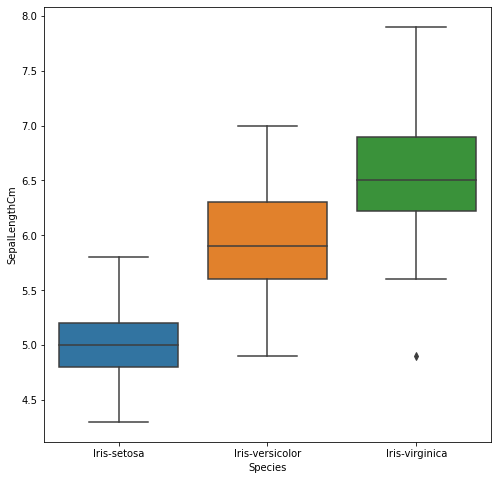

In [4]:
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.show()

We can see the box plot of Iris-Virginica has some outliers

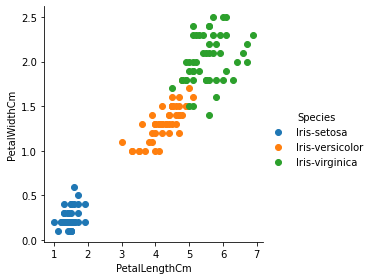

In [5]:
sns.FacetGrid(df, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

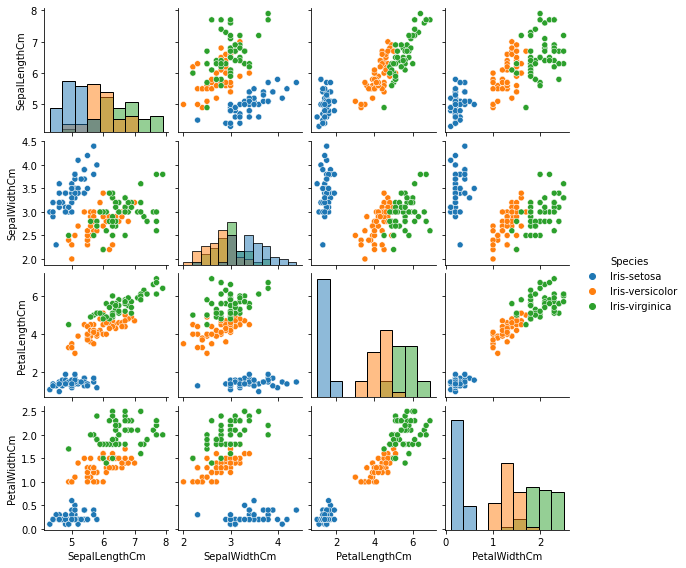

In [6]:
sns.pairplot(df.drop(['Id'], axis=1), hue="Species", diag_kind="hist", size=2.0);

This shows how similar versicolor and virginica are, at least with the given features.But there could be features that you didn't measure that would more clearly separate the species.It's the same for any unsupervised learning - you need to have the right features to separate the groups in the best way.

In [7]:
iris_df = df.drop(['Species'], axis=1)
y = df['Species']

In [8]:
def y_label (invalue):
    if invalue == 'Iris-setosa' :
        return 1
    elif invalue == 'Iris-virginica' :
        return 0
    else :
        return 2
df1 = pd.DataFrame(data=y.values, columns=['species'])

df1['index']=df1['species'].apply(y_label) 

In [9]:
ss = StandardScaler()
data_scaled = ss.fit_transform(iris_df)

X_scaled = pd.DataFrame(data_scaled, columns = iris_df.columns)

X_scaled.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


# K-Means algorithm

## Finding optimal number of clusters - Elbow Plot

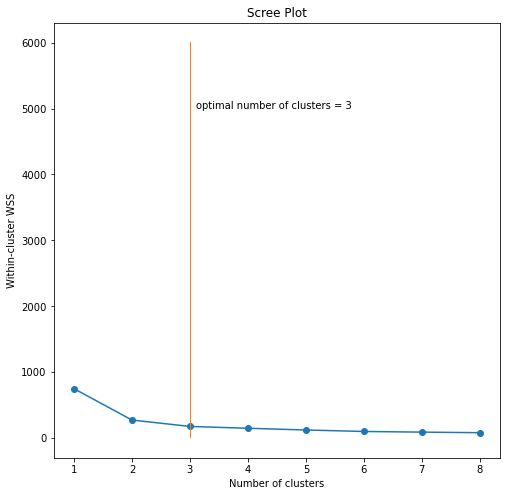

In [10]:
k=9
WSS = []
for k in range(1,9):
        kmeans_model = KMeans(n_clusters=k, random_state=123)
        kmeans_model.fit(data_scaled)
        WSS.append(kmeans_model.inertia_)
plt.plot(range(1,9), WSS, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster WSS")
plt.title("Scree Plot")
plt.plot([3]*6000, range(1,6001), ",")
plt.text(3.1, 5001, "optimal number of clusters = 3")
plt.show()

In [11]:

for i in range(2,8):
    labels=KMeans(n_clusters=i,random_state=123).fit(data_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(data_scaled,labels,metric="euclidean",random_state=123)))

Silhoutte score for k= 2 is 0.570815210603504
Silhoutte score for k= 3 is 0.452949780355554
Silhoutte score for k= 4 is 0.3911646146569221
Silhoutte score for k= 5 is 0.3290872528629286
Silhoutte score for k= 6 is 0.3275372800058476
Silhoutte score for k= 7 is 0.3317386351955721


The Silhouette score is maximum for 3 clusters.

Hence, based on Silhouette score and elbow plot 3 clusters were considered as optimal clusters

In [12]:
km = KMeans(n_clusters=3, random_state=123)
km.fit(data_scaled)
print('inertia with clusters=3 -->' ,km.inertia_)
km.cluster_centers_

inertia with clusters=3 --> 177.05608895062971


array([[ 1.14317894,  1.03542672, -0.07079946,  1.04224753,  1.09269889],
       [-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 0.07560189,  0.03894137, -0.73184462,  0.30676007,  0.21508647]])

In [13]:
predicted_cluster = km.predict(iris_df)
predicted_labels = km.labels_

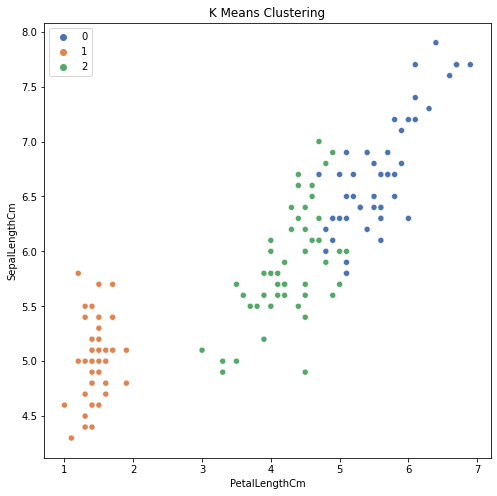

In [14]:
sns.scatterplot(df['PetalLengthCm'],df['SepalLengthCm'],hue = predicted_labels,palette='deep')
plt.title('K Means Clustering')
plt.show()

# Comparing Clustered data with original data

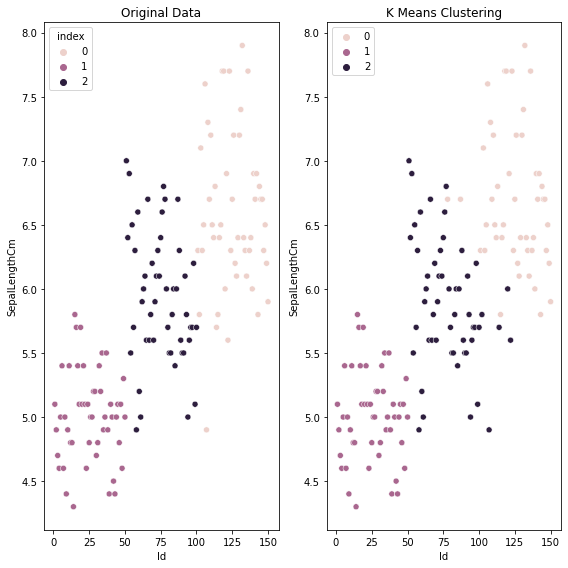

In [15]:
plt.subplot(1,2,1)
sns.scatterplot(df['Id'],df['SepalLengthCm'],hue = df1['index'])
plt.title('Original Data')
plt.subplot(1,2,2)
sns.scatterplot(df['Id'],df['SepalLengthCm'],hue = predicted_labels)
plt.title('K Means Clustering')
plt.tight_layout()

In [16]:
def predict_species (invalue):
    if invalue == 1:
        return 'Iris-setosa' 
    elif invalue == 0 :
        return 'Iris-virginica'
    else :
        return 'Iris-versicolor'
df['predict_label']= pd.DataFrame(data=predicted_labels, columns=['predict_label'])

df['predict_species']=df['predict_label'].apply(predict_species) 

In [17]:
sum(np.where((df['Species']!=df['predict_species']),1,0))

7

In [18]:
df[df['Species']!=df['predict_species']]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predict_label,predict_species
77,78,6.7,3.0,5.0,1.7,Iris-versicolor,0,Iris-virginica
86,87,6.7,3.1,4.7,1.5,Iris-versicolor,0,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica,2,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica,2,Iris-versicolor
113,114,5.7,2.5,5.0,2.0,Iris-virginica,2,Iris-versicolor
119,120,6.0,2.2,5.0,1.5,Iris-virginica,2,Iris-versicolor
121,122,5.6,2.8,4.9,2.0,Iris-virginica,2,Iris-versicolor


#### By K-means clustering with number of clusters=3 , we are able to cluster 143 species correctly out of 150 species.The cluster Iris-versicolor and Iris-virginica are misclustered.

# Thank you!!!